In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')


## Training Data

In [2]:
train = pd.read_csv("bigdatamart_train.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
# Checking first 5 rows
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Checking no. of rows and columns
print("Total no. of :",len(train),"rows and ",len(train.columns),"columns are present.")

Total no. of : 8523 rows and  12 columns are present.


In [6]:
# Checking the columns 
print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [7]:
# checking the datatypes
print(train.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


`Our dataset contains float,integer and object type of dataset.`

In [8]:
# Checking the dataset information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


`In our dataset there are 12 columns with data in 8523 rows and 2 of these columns contains missing values.Datatypes are`-
* float - 4 columns
* integer - 1 column
* object - 7 columns

`So most of our date is in categorical form,we have to encode the categorical data into float or integer before spliting in training and testing`.

In [9]:
# Checking missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#Item_weight column missing percentage 

print("Missing values in Item_Weight: "+str(train['Item_Weight'].isnull().sum()))
print("Percentage of missing values :"+str(round(train['Item_Weight'].isnull().sum()/len(train)*100,0)) + "%")

Missing values in Item_Weight: 1463
Percentage of missing values :17.0%


`Item_Weight column contains 17%  missing values.It will be treated further` 

In [11]:
# Outlet_size missing percentage
print("Missing values of Outlet_size :"+str(train['Outlet_Size'].isnull().sum()))
print("Percentage of missing :"+str(round(train['Outlet_Size'].isnull().sum()/len(train)*100,0)) + "%")

Missing values of Outlet_size :2410
Percentage of missing :28.0%


`Outlet_Size column contains 28% missing values which is a high percentage of missing values.`

In [12]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
numerical_features=train.select_dtypes(include=[np.number])
categorical_features=train.select_dtypes(include=[np.object])

In [14]:
numerical_features.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
categorical_features.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## Visualization

### Categorical features

In [16]:
# Let's check the number of distinct values in each column from categorical data.
for i in categorical_features.columns:
    if categorical_features[i].dtype=="object":
        print("{} -> column contains {} number of distinct values".format(i,len(categorical_features[i].value_counts())))
        print()

Item_Identifier -> column contains 1559 number of distinct values

Item_Fat_Content -> column contains 5 number of distinct values

Item_Type -> column contains 16 number of distinct values

Outlet_Identifier -> column contains 10 number of distinct values

Outlet_Size -> column contains 3 number of distinct values

Outlet_Location_Type -> column contains 3 number of distinct values

Outlet_Type -> column contains 4 number of distinct values



`Some columns contains a few number of distinct variabels while two columns contains distinct values above 10 or 10 and one column contains distinct values 1559,which is a very huge distinction and converting it into numerical format will create Dimensionality curse.So,it will be better to drop this column.`

In [17]:
# Let's check the value counts
for i in categorical_features.columns:
    if categorical_features[i].dtype=="object":
        print(categorical_features[i].value_counts())
        print()

FDW13    10
FDG33    10
DRN47     9
NCY18     9
FDW49     9
         ..
FDE52     1
FDO33     1
FDC23     1
FDK57     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium   

`In Item_Identifier column a lot of distinct values ae present`.

`In Item_Fat_Content we can see that there are only two types of fat-`
1. Low Fat
2. Regular Fat


`There is need of renaming the class of this column.`

`and rest of all other columns are giving proper information.`

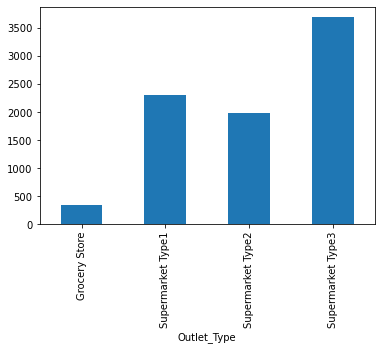

In [18]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot(kind='bar')

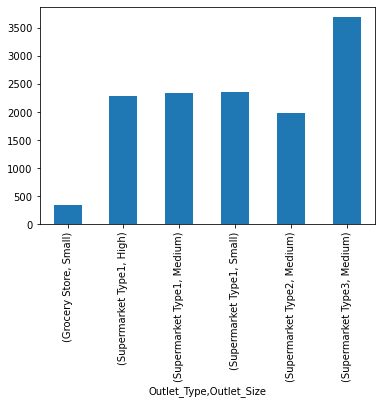

In [19]:
train.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].mean().plot(kind='bar')

In [20]:
# Let's replace the repeated values of Fat column
train['Item_Fat_Content'].replace("LF","Low Fat",inplace=True)
train['Item_Fat_Content'].replace("low fat","Low Fat",inplace=True)
train['Item_Fat_Content'].replace("reg","Regular",inplace=True)
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [21]:
# Converting categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type']
for i in columns:
    train[i]  = le.fit_transform(train[i])
    
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,NaN,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,High,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,NaN,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,Small,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,Medium,2,2,1845.5976


In [22]:
# Converting Outlet_size column form categorical to numerical
train.Outlet_Size.replace("Small",0,inplace = True)
train.Outlet_Size.replace("Medium",1,inplace = True)
train.Outlet_Size.replace("High",2,inplace = True)
train.Outlet_Size.astype(float)
train.Outlet_Size.unique()

# This is treated individually because it contains missing values.

array([ 1., nan,  2.,  0.])

In [23]:
# Let's fill NaN values of both the columns

list= []

for i in train.Outlet_Location_Type.unique():
    list.append(i)

for i in range(0,len(list)):
    exec(f'OLT_{i} = train.loc[train.Outlet_Location_Type=={list[i]}]')
    exec(f"OLT_{i}.Outlet_Size.fillna(OLT_{i}['Outlet_Size'].mode()[0], inplace = True)")

Train = pd.concat([OLT_0,OLT_1,OLT_2])
train= Train.sort_index()

In [24]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:

list= []

for i in train.Item_Fat_Content.unique():
    list.append(i)
    
for i in range(0,len(list)):
    exec(f'IFC_{i} = train.loc[train.Item_Fat_Content=={list[i]}]')
    exec(f"IFC_{i}.Item_Weight.fillna(IFC_{i}['Item_Weight'].median(), inplace = True)")

Train = pd.concat([IFC_0,IFC_1])
train= Train.sort_index()

In [26]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### We have Removed the null values from our data set lets see the summary of the data

In [27]:
train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.812991,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,0.611522,1.112871,1.201220,2181.288914
std,449.222377,4.227366,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.675514,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,0.000000,0.000000,1.000000,834.247400
50%,783.000000,12.650000,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,1.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


### Lets see the Correlation of all the Feature_variable with Target_Variable:

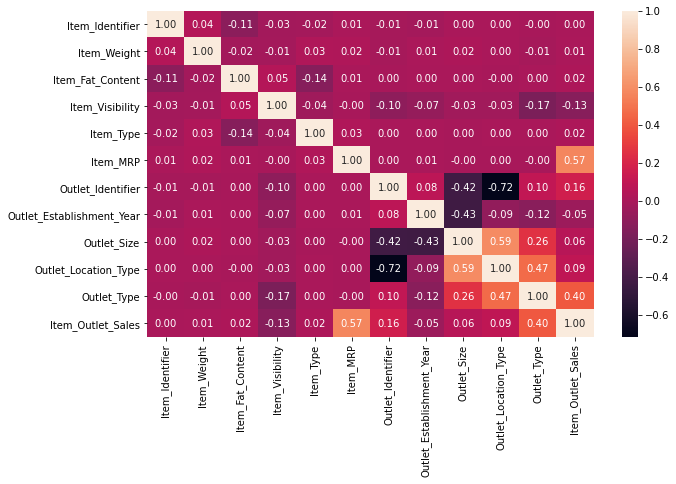

In [28]:
# checkinng correlation values using the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True,fmt=".2f")

``Using the correlation graph we can see that there is almost no relation between the Outlet_Sales and Establishment_Year of the store.``

`Item_MRP shows some strong positive correaltion with Outlet_Sales,It means that MRP of a product is goingto show its effect on the Outlet_Sales.`

` Item_Visibility is having only 13% of correlaton withe the Outlet_Sales.Which is going to have a very little effect on the sales of outlet.`

`Item_Weight showing no correlatioin wiht the Outlet_Sales,whihc means that there is no effect on the sale of item from the weight of item.`

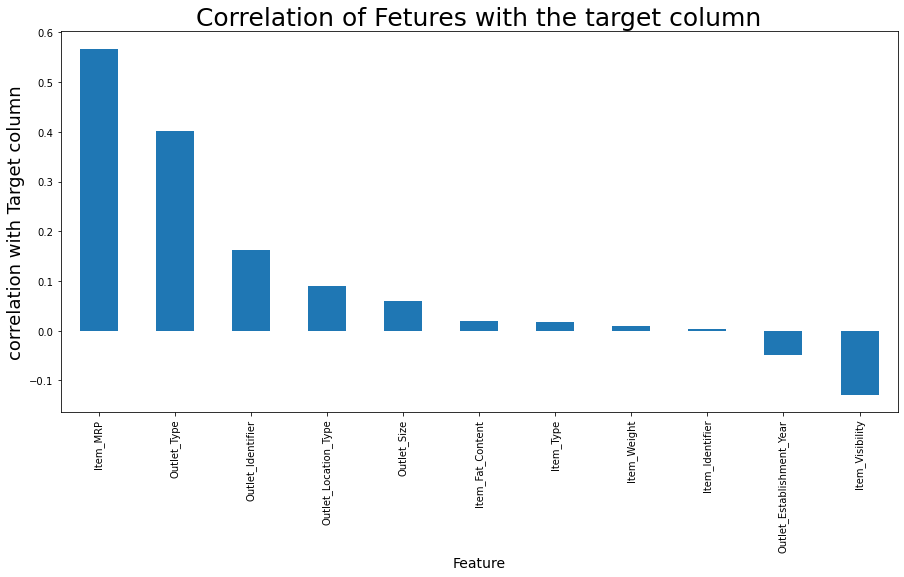

In [29]:
plt.figure(figsize=(15,7))
train.corr()["Item_Outlet_Sales"].sort_values(ascending=False).drop(["Item_Outlet_Sales"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

In [30]:
cor=pd.DataFrame(train.corr()["Item_Outlet_Sales"].sort_values(ascending=False)).drop(["Item_Outlet_Sales"])
print("Key observation:\n", cor)

Key observation:
                            Item_Outlet_Sales
Item_MRP                            0.567574
Outlet_Type                         0.401522
Outlet_Identifier                   0.162325
Outlet_Location_Type                0.089367
Outlet_Size                         0.060517
Item_Fat_Content                    0.018719
Item_Type                           0.017048
Item_Weight                         0.009574
Item_Identifier                     0.002869
Outlet_Establishment_Year          -0.049135
Item_Visibility                    -0.128625


### Lets Identify the Skewness in the data By Univariate analysis

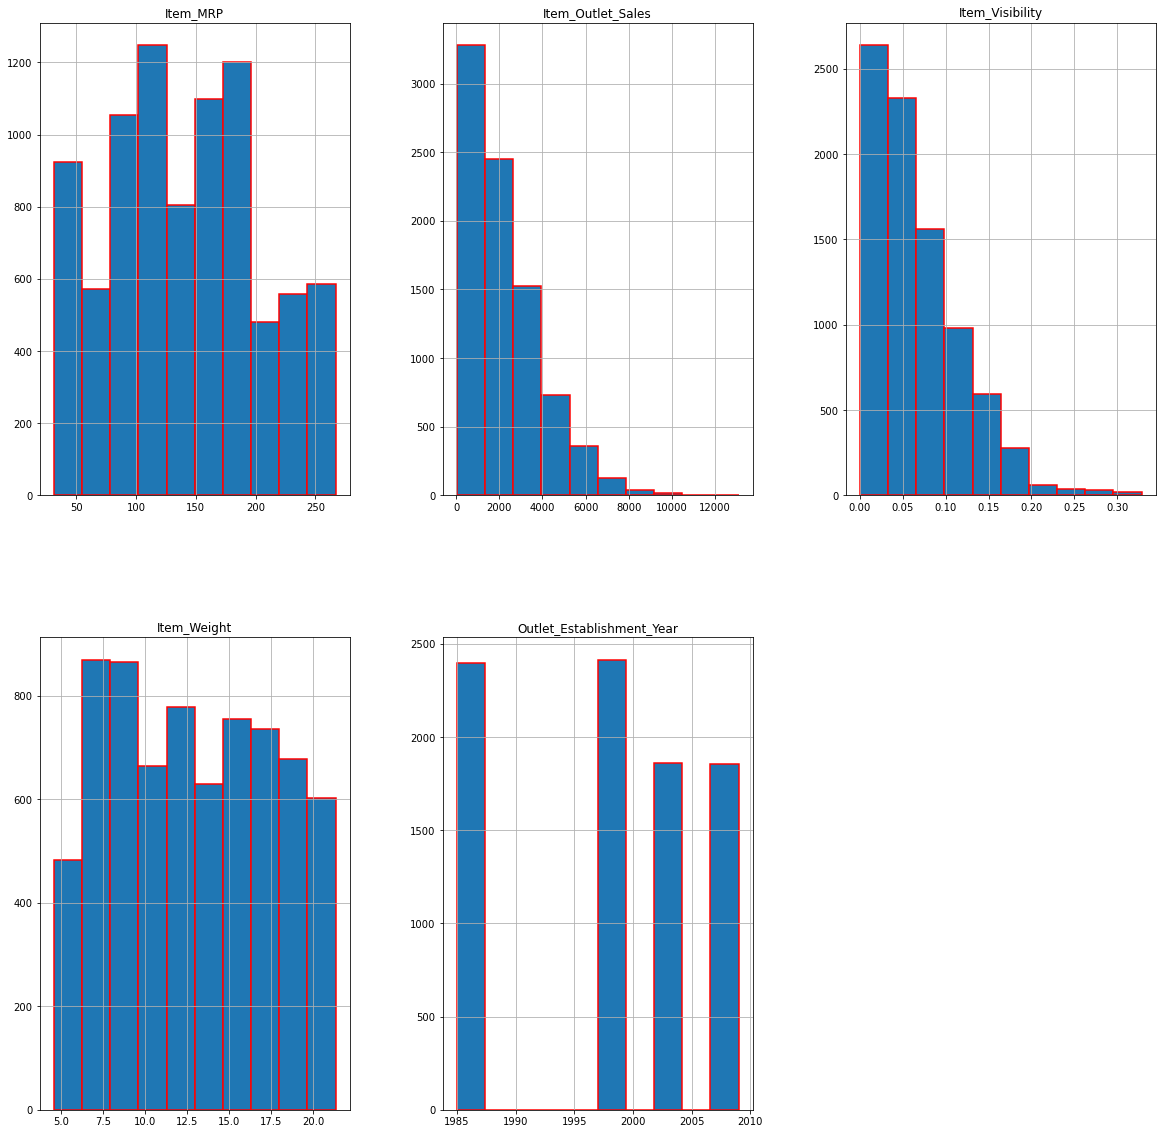

In [86]:
# Let's check the distribution of data in each numerical columns
numerical_features.hist(layout=(2,3),edgecolor="red",linewidth= 1.5,figsize=(20,20),bins=10,grid=True)
plt.show()

`From the histogram we can see that there is skewness present in the Outlet_Sales and Item_Visisbility.As there is no need to remove skewness from the dependent variables but Item_Visibility skewness will be treated.`

In [32]:
train.skew()

Item_Identifier             -0.008877
Item_Weight                  0.122130
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                  0.655208
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [33]:
from scipy.stats import yeojohnson

skew = ["Item_Visibility","Item_MRP","Item_Outlet_Sales"] 

for i in skew:
    train[i]= yeojohnson(train[i])[0]

In [34]:
train.skew()

Item_Identifier             -0.008877
Item_Weight                  0.122130
Item_Fat_Content             0.616705
Item_Visibility              0.124279
Item_Type                    0.101655
Item_MRP                    -0.115386
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                  0.655208
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales           -0.074791
dtype: float64

### Lets Identify the outliers and remove them

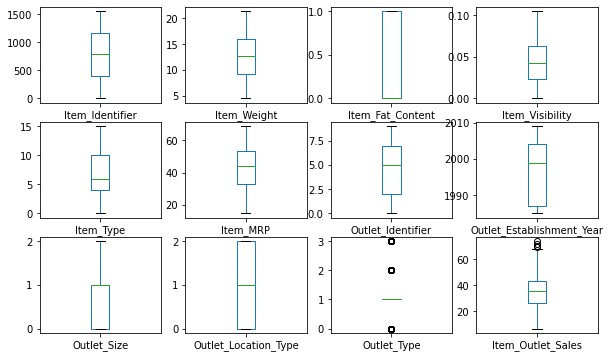

In [35]:
train.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,6))
plt.show()

In [36]:
from scipy.stats import zscore
z =np.abs(zscore(train))
threshold=3
new_train=train[(z<3).all(axis=1)]

In [37]:
new_train.shape, train.shape

((8521, 12), (8523, 12))

In [38]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.014866,4,65.573989,9,1999,1.0,0,1,46.821722
1,8,5.92,1,0.017593,14,20.174741,3,2009,1.0,2,2,20.917892
2,662,17.50,0,0.015475,10,43.818122,9,1999,1.0,0,1,37.830713
3,1121,19.20,1,-0.000000,6,52.404215,0,1998,1.0,2,0,25.420371
4,1297,8.93,0,-0.000000,9,21.852361,1,1987,2.0,2,1,28.577991


In [39]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
new_train[["Item_Weight","Item_Visibility","Item_MRP"]] = sc.fit_transform(new_train[["Item_Weight","Item_Visibility","Item_MRP"]])

In [40]:
new_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.830977,0,-1.147270,4,1.624243,9,1999,1.0,0,1,46.821722
1,8,-1.630482,1,-1.037476,14,-1.594892,3,2009,1.0,2,2,20.917892
2,662,1.108652,0,-1.122757,10,0.081595,9,1999,1.0,0,1,37.830713
3,1121,1.510771,1,-1.745980,6,0.690411,0,1998,1.0,2,0,25.420371
4,1297,-0.918496,0,-1.745980,9,-1.475936,1,1987,2.0,2,1,28.577991


In [41]:

x=new_train.drop(columns=["Item_Outlet_Sales"], axis = 1)
y=new_train[['Item_Outlet_Sales']]

In [42]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X= sc.fit_transform(x)
x=pd.DataFrame(X,columns=x.columns)

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,700):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = r2_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 60.02134519761524 found on randomstate 637


In [44]:
print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,y_pred))

MEAN ABSOLUTE ERROR:  6.0584702246213755


In [45]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [46]:
models=[LinearRegression(), Lasso(), Ridge(alpha=1, random_state=637), ElasticNet(), 
        SVR(), KNeighborsRegressor(), DecisionTreeRegressor(),
        AdaBoostRegressor(random_state=637), RandomForestRegressor(random_state=637)]


In [47]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of ",m,"is ",m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    
    pred=m.predict(x_test)
    print("mean absolute error is",mean_absolute_error(y_test,pred))
    mean_abs_e.append(mean_absolute_error(y_test,pred))
    print("mean squared error is",mean_squared_error(y_test,pred))
    mean_sqr_e.append(mean_squared_error(y_test,pred))
    print("R2 score is : ",r2_score(y_test,pred))
    r2.append(r2_score(y_test,pred))
    print("\n")

Score of  LinearRegression() is  0.5671805422215134
mean absolute error is 6.0584702246213755
mean squared error is 57.63503835187018
R2 score is :  0.5647769669902176


Score of  Lasso() is  0.5342142081710468
mean absolute error is 6.357637655047018
mean squared error is 61.645392257091764
R2 score is :  0.534493333284324


Score of  Ridge(alpha=1, random_state=42) is  0.5671805160571552
mean absolute error is 6.058482100360358
mean squared error is 57.634205463548106
R2 score is :  0.5647832564313641


Score of  ElasticNet() is  0.4770482701560489
mean absolute error is 6.7912068392167395
mean squared error is 69.2365417154462
R2 score is :  0.4771698164485211


Score of  SVR() is  0.6987156508718388
mean absolute error is 5.015075868724819
mean squared error is 41.42353452767037
R2 score is :  0.6871958993928016


Score of  KNeighborsRegressor() is  0.7547114841891588
mean absolute error is 5.546942216808842
mean squared error is 50.215856344763864
R2 score is :  0.620801895365747


In [48]:
mean_score=[]
STD=[]

for m in models:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print("Cross validation mean score of",m,"is ",score.mean())
    mean_score.append(score.mean())
    print("and standard deviation is ",score.std())
    STD.append(score.std())
    print(score)
    print("\n")

Cross validation mean score of LinearRegression() is  0.5649342752418752
and standard deviation is  0.01368364789107344
[0.57685323 0.57816158 0.54315892 0.55490195 0.5715957 ]


Cross validation mean score of Lasso() is  0.5338997555035434
and standard deviation is  0.005724176699457161
[0.53943426 0.54008495 0.52757813 0.52670566 0.53569577]


Cross validation mean score of Ridge(alpha=1, random_state=42) is  0.564934750168326
and standard deviation is  0.013678926314102991
[0.57684718 0.57815617 0.54316831 0.55490223 0.57159987]


Cross validation mean score of ElasticNet() is  0.4745798571247473
and standard deviation is  0.004352297102765611
[0.47630528 0.47907256 0.47477168 0.46632659 0.47642318]


Cross validation mean score of SVR() is  0.6854601994404427
and standard deviation is  0.010664944390763691
[0.68189796 0.67898026 0.6743055  0.68697721 0.70514007]


Cross validation mean score of KNeighborsRegressor() is  0.6175244189558151
and standard deviation is  0.01481197014599

`We are taking SVR algorithm because it has minimum difference in r2 score and cross validation score with maximum CV score with minumum absolute error and minimum standard deviation`.

### Hyper-parameter tunning

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid={"kernel":["linear",'rbf','sigmoid','poly'],
           "gamma":['scale','auto']}
svr=SVR()
gscv = GridSearchCV(estimator=svr,param_grid=param_grid,cv=8)
gscv.fit(x_train,y_train)
print(gscv.best_params_)

{'gamma': 'scale', 'kernel': 'rbf'}


In [51]:
svr = SVR(gamma= 'scale', kernel= 'rbf')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))


0.6987156508718388


pred_decision =svr.predict(x_test)

svr_r = r2_score(y_test,pred_decision)
print(svr_r)

svr_score = cross_val_score(svr,x,y,cv=5)
svr =svr_score.mean()
print(svr)

`Here our score,r2_score and cross validation metrics score is almost equal so there is no overfitting  and underfitting in our model.`

### Saving final model

In [52]:
import joblib
filename="svr.obj"
joblib.dump(svr,filename)

['svr.obj']

In [53]:
models=joblib.load(filename)
prediction=models.predict(x_test)
prediction

array([38.97676313, 46.5965407 , 43.72569776, ..., 52.71468974,
       15.35683052, 44.5401922 ])

## Testing Data

In [54]:
test=pd.read_csv("bigdatamart.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [55]:
# Checking no. of rows and columns
print("Total no. of :",len(test),"rows and ",len(test.columns),"columns are present.")

Total no. of : 5681 rows and  11 columns are present.


In [56]:
# Checking the columns 
print(test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [57]:
# checking the datatypes
print(test.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


In [58]:
# Checking the dataset information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [59]:
# Checking missing values
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [60]:
#Item_weight column missing percentage 

print("Missing values in Item_Weight: "+str(test['Item_Weight'].isnull().sum()))
print("Percentage of missing values :"+str(round(test['Item_Weight'].isnull().sum()/len(test)*100,0)) + "%")

Missing values in Item_Weight: 976
Percentage of missing values :17.0%


In [61]:
# Outlet_size missing percentage
print("Missing values of Outlet_size :"+str(test['Outlet_Size'].isnull().sum()))
print("Percentage of missing :"+str(round(test['Outlet_Size'].isnull().sum()/len(test)*100,0)) + "%")

Missing values of Outlet_size :1606
Percentage of missing :28.0%


In [62]:
numerical_features_t=test.select_dtypes(include=[np.number])
categorical_features_t=test.select_dtypes(include=[np.object])

In [63]:
# Let's check the number of distinct values in each column from categorical data.
for i in categorical_features_t.columns:
    if categorical_features_t[i].dtype=="object":
        print("{} -> column contains {} number of distinct values".format(i,len(categorical_features_t[i].value_counts())))
        print()

Item_Identifier -> column contains 1543 number of distinct values

Item_Fat_Content -> column contains 5 number of distinct values

Item_Type -> column contains 16 number of distinct values

Outlet_Identifier -> column contains 10 number of distinct values

Outlet_Size -> column contains 3 number of distinct values

Outlet_Location_Type -> column contains 3 number of distinct values

Outlet_Type -> column contains 4 number of distinct values



In [64]:
# Let's check the value counts
for i in categorical_features_t.columns:
    if categorical_features_t[i].dtype=="object":
        print(categorical_features_t[i].value_counts())
        print()

FDK57    8
FDQ60    8
FDZ50    8
FDP15    8
FDN52    8
        ..
FDI14    1
NCP05    1
FDJ44    1
DRF03    1
DRF23    1
Name: Item_Identifier, Length: 1543, dtype: int64

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

OUT027    624
OUT013    621
OUT046    620
OUT035    620
OUT049    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

Medium    1862
Small     1592
High  

In [65]:
test.shape

(5681, 11)

In [66]:
# Converting Outlet_size column form categorical to numerical
test.Outlet_Size.replace("Small",0,inplace = True)
test.Outlet_Size.replace("Medium",1,inplace = True)
test.Outlet_Size.replace("High",2,inplace = True)
test.Outlet_Size.astype(float)
test.Outlet_Size.unique()

# This is treated individually because it contains missing values.

array([ 1., nan,  0.,  2.])

In [67]:
# Let's replace the repeated values of Fat column
test['Item_Fat_Content'].replace("LF","Low Fat",inplace=True)
test['Item_Fat_Content'].replace("low fat","Low Fat",inplace=True)
test['Item_Fat_Content'].replace("reg","Regular",inplace=True)
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [68]:
# Converting categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type']
for i in columns:
    test[i]  = le.fit_transform(test[i])

In [69]:
# Let's fill NaN values of both the columns
list= []

for i in test.Outlet_Location_Type.unique():
    list.append(i)

for i in range(0,len(list)):
    exec(f'OLT_{i} = test.loc[test.Outlet_Location_Type=={list[i]}]')
    exec(f"OLT_{i}.Outlet_Size.fillna(OLT_{i}['Outlet_Size'].mode()[0], inplace = True)")

TesT = pd.concat([OLT_0,OLT_1,OLT_2])
test= TesT.sort_index()

In [70]:
list= []

for i in test.Item_Fat_Content.unique():
    list.append(i)
    
for i in range(0,len(list)):
    exec(f'IFC_{i} = test.loc[test.Item_Fat_Content=={list[i]}]')
    exec(f"IFC_{i}.Item_Weight.fillna(IFC_{i}['Item_Weight'].median(), inplace = True)")

TesT = pd.concat([IFC_0,IFC_1])
test= TesT.sort_index()

In [71]:
test.shape

(5681, 11)

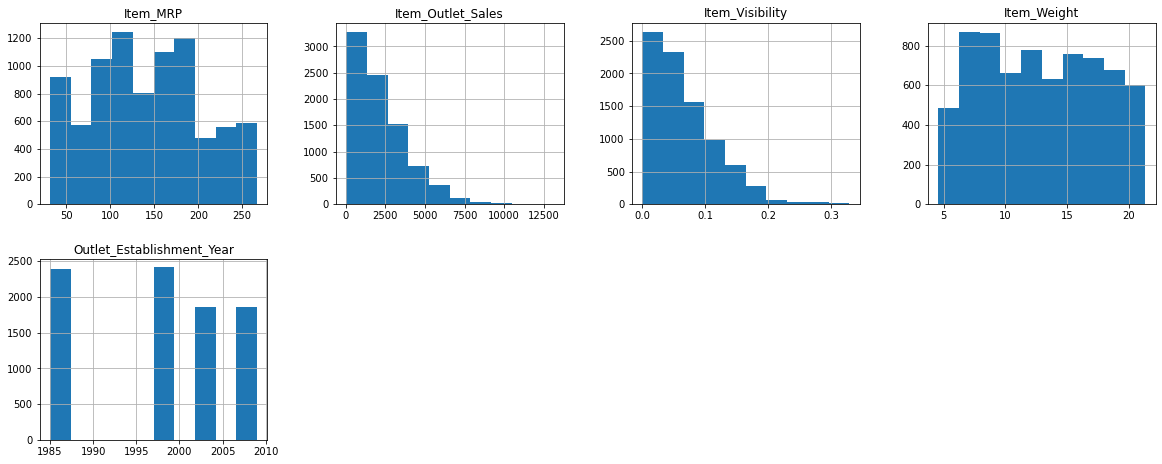

In [72]:
# Let's check the distribution of data in each numerical columns
numerical_features.hist(layout=(3,4),figsize=(20,12),bins=10,grid=True)
plt.show()

In [73]:
numerical_features.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [74]:
from scipy.stats import yeojohnson

skew = ["Item_Visibility"] 

test["Item_Visibility"]= yeojohnson(test["Item_Visibility"])[0]

In [75]:
numerical_features.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [76]:
sc= StandardScaler()
test[["Item_Weight","Item_Visibility","Item_MRP"]] = sc.fit_transform(test[["Item_Weight","Item_Visibility","Item_MRP"]])

In [77]:
test.shape

(5681, 11)

In [78]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [79]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1.909178,0,-1.462069,13,-0.536555,9,1999,1.0,0,1
1,1067,-1.020083,1,-0.448019,4,-0.868937,2,2007,0.0,1,1
2,1406,0.462194,0,0.871342,11,1.629848,0,1998,1.0,2,0
3,809,-1.251836,0,-1.175927,13,0.226697,2,2007,0.0,1,1
4,1184,-0.196596,1,1.153823,4,1.508110,5,1985,1.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,-0.502463,1,-1.243150,13,0.004727,8,1997,0.0,0,1
5677,306,-1.184780,1,1.453584,15,0.455014,3,2009,1.0,2,2
5678,1412,-0.620104,0,0.397868,8,-0.360485,7,2002,0.0,1,1
5679,517,0.626891,1,-1.760234,3,1.190844,2,2007,0.0,1,1


## Loading the saved model

In [80]:
model=joblib.load(filename)

In [81]:
model

SVR()

In [82]:
prediction=model.predict(x_test)

## Conclusion

In [83]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,38.976763
1,46.596541
2,43.725698
3,46.114305
4,50.410966
...,...
2126,41.404530
2127,35.601979
2128,52.714690
2129,15.356831


In [87]:
# Save into csv files
prediction.to_csv("Predicted_sales.csv")